Naive Bayes classifier (using yelp reviews) performing sentiment analysis, classifying whether feedback left on a website is either positive or negative.  Score is either 1 (for positive) or 0 (for negative)

Data obtained from here https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [426]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [427]:
import spacy    
import en_core_web_sm
nlp = en_core_web_sm.load()

### Model #1 - words thought of off the top of my mind

In [428]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [429]:
reviews.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [430]:
# think of keywords that might represent 
# positive and negative reviews
keywords = ['worst',
           'hate',
           'terrible',
           'horrible',
           'worst',
           'cheap', 
           'love',
           'great',        
           'best',
           'amazing',          
           'quality']

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [431]:
# convert spam column into boolean 
reviews[1] = (reviews[1] == 1)

In [432]:
reviews.head()

,0,1,worst,hate,terrible,horrible,cheap,love,great,best,amazing,quality
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,True,False,False,False


(11.0, 0.0)

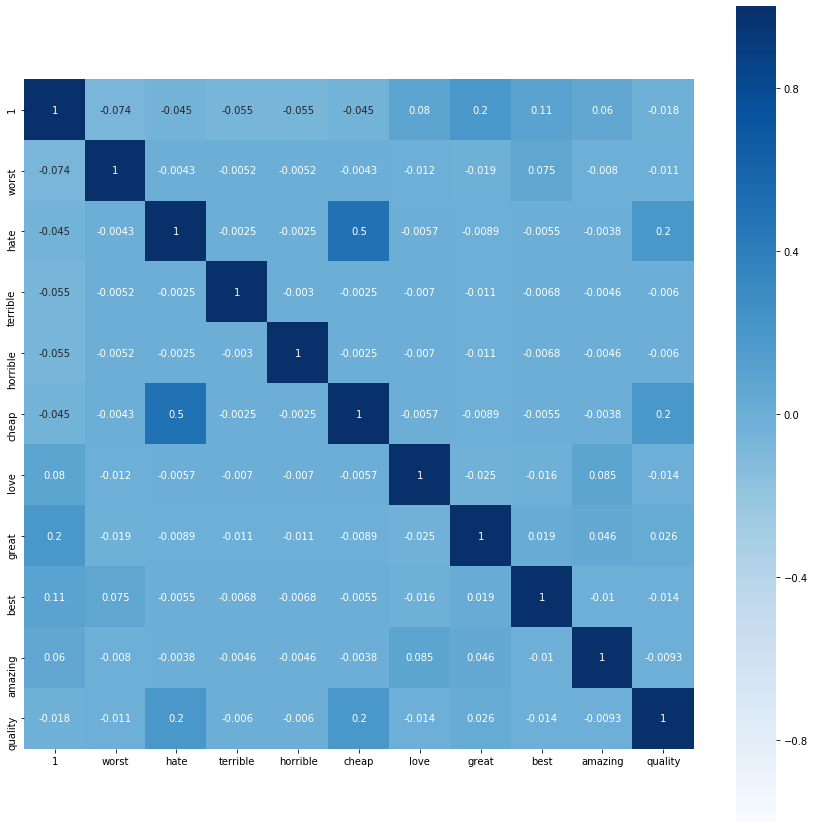

In [433]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [434]:
# create variables that can easily
# be fed into naive bayes below
data = reviews[keywords]
target = reviews[1]

In [435]:
data.head()

,worst,hate,terrible,horrible,worst,cheap,love,great,best,amazing,quality
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False


In [436]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [437]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 438


### Create confustion matrix to review performance

In [438]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [439]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [440]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,495,5
Actual: Yes,433,67


In [441]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.13

this seems like a very low number

In [442]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.99

### Compare/contrast with different holdout groups

In [443]:
# Test your model with different holdout groups.

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.575
Testing on Sample: 0.562


In [444]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.57, 0.53, 0.55, 0.58, 0.58])

#### Cross Validation - rather than use sklearn, try to build on my own

In [445]:
# bin data into 5 bins
reviews['cv_bins'] = pd.cut(reviews.index, 5, labels=[1,2,3,4,5])

In [446]:
reviews.head()

,0,1,worst,hate,terrible,horrible,cheap,love,great,best,amazing,quality,cv_bins
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,1
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False,1
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,1
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,1
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,True,False,False,False,1


In [447]:
reviews[reviews.cv_bins == bin].iloc[:,2:12]

,worst,hate,terrible,horrible,cheap,love,great,best,amazing,quality


In [448]:
# iterate through bins
# analyzing the training folds
# against each of the holdout folds

for bin in range(1, 6):
    # use tilde(~) to negate and group all other bins
    # as the train data
    X_train = reviews[~(reviews.cv_bins == bin)].iloc[:,2:12]
    y_train = reviews[~(reviews.cv_bins == bin)].iloc[:,1]
    
    # test data
    X_test = reviews[reviews.cv_bins == bin].iloc[:,2:12]
    y_test = reviews[reviews.cv_bins == bin].iloc[:,1]
    
    
    print(f'Bin {bin} being held out: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

Bin 1 being held out: 0.52
Bin 2 being held out: 0.495
Bin 3 being held out: 0.51
Bin 4 being held out: 0.48
Bin 5 being held out: 0.275


Since sklarn chooses it's folds randomly, these numbers won't exactly agree with the above sklearn cross_val_score.

### Model #2 - combinations of words

In [449]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [450]:
keywords = ['not good',
           'very good',
           'highly recommend',   
           'hole in the wall',
           'very attentive',          
           'not go back']

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(
        ' ' + str(key) + ' ',
        case=False)

# convert spam column into boolean 
reviews[1] = (reviews[1] == 1)

In [451]:
reviews.head()

,0,1,not good,very good,highly recommend,hole in the wall,very attentive,not go back
0,Wow... Loved this place.,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False


(7.0, 0.0)

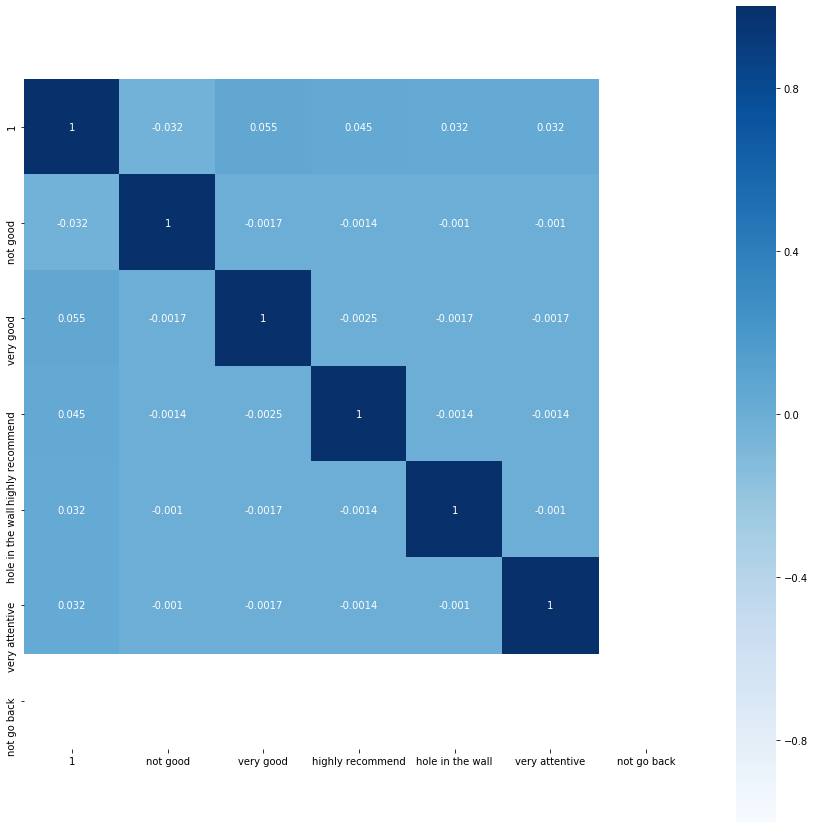

In [452]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [453]:
# create variables that can easily
# be fed into naive bayes below
data = reviews[keywords]
target = reviews[1]

In [454]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [455]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 493


### Create confustion matrix to review performance

In [456]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [457]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [458]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,500,0
Actual: Yes,493,7


In [459]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.01

In [460]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

1.0

Dismal results

### Examine for overfitting

In [461]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.505, 0.5  , 0.515, 0.505, 0.5  ])

It doesn't appear as if overfitting is taking place

### Model #3 - top words by frequency

In [462]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [463]:
reviews.iloc[:,0]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: 0, Length: 1000, dtype: object

In [464]:
# find top words by frequency
bag_of_words = []

for row in reviews[0].str.split():
    for word in row:
        if len(word) > 3 and word not in nlp.Defaults.stop_words:
            bag_of_words.append(word)

            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [465]:
# all of the top 10 words seem
# to have positive sentiment
bag_of_words_df.iloc[:,0].head(10).values

array(['food', 'place', 'good', 'This', 'like', 'service', 'great',
       'time', 'good.', "don't"], dtype=object)

In [466]:
# create column for each keyword above
# return bool value if keyword found
for key in bag_of_words_df.iloc[:,0].head(10).values:
    reviews[str(key)] = reviews[0].str.contains(
        ' ' + str(key) + ' ',
        case=False)
    
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [467]:
reviews.head()

,0,1,food,place,good,This,like,service,great,time,good.,don't
0,Wow... Loved this place.,True,False,False,False,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,True,False,False,False


(11.0, 0.0)

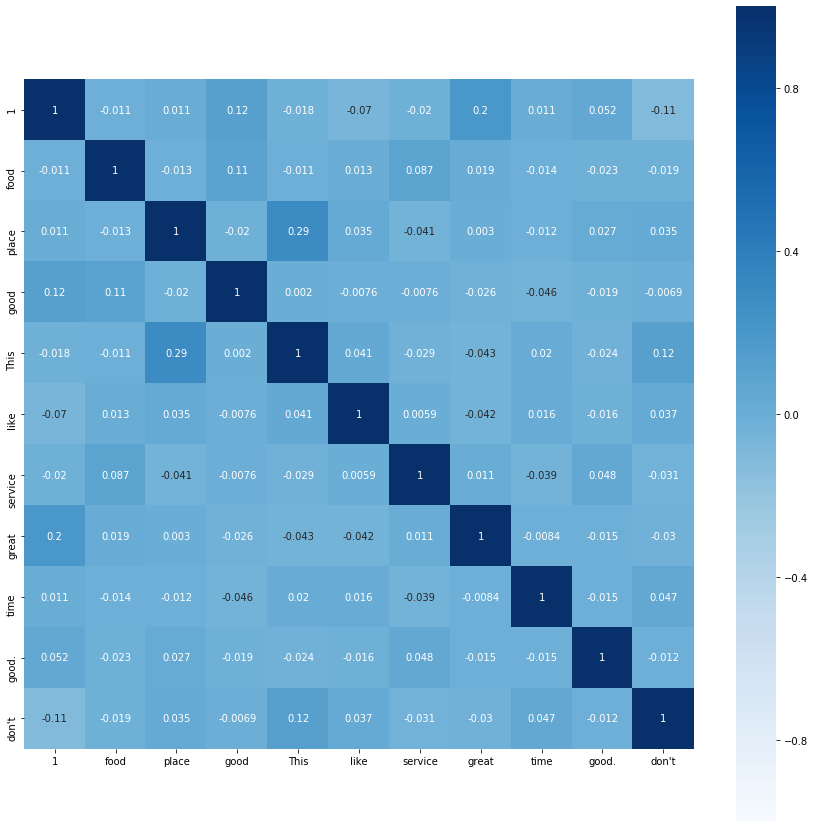

In [468]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [469]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,2:]
target = reviews[1]

In [470]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [472]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 417


### Create confusion matrix to review performance

In [473]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [474]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [475]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,462,38
Actual: Yes,379,121


In [476]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.24

In [477]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.92

### Examine for overfitting

In [478]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.575, 0.56 , 0.545, 0.555, 0.57 ])

It doesn't appear as if overfitting is taking place

### Model #4 - Feature engineering using parts of speech - Interjections

In [479]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = en_core_web_sm.load()

In [480]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [481]:
reviews.iloc[:,0]

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: 0, Length: 1000, dtype: object

In [482]:
# tokenize data using spaCy
# I found this function at the below web address
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [483]:
# apply above function
reviews['spacy_tokens'] = reviews[0].apply(lambda x: spacy_tokenizer(x))

In [484]:
# find top words by frequency
bag_of_words = []

for row in reviews.spacy_tokens:
    for word in row:
        bag_of_words.append(word)
            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [485]:
lemma = []
pos = []
tag = []

for doc in nlp.pipe(bag_of_words_df['tokens'].astype('unicode').values, batch_size=50):  
    lemma.append([n.lemma_ for n in doc])
    pos.append([n.pos_ for n in doc])
    tag.append([n.tag_ for n in doc])

bag_of_words_df['lemma'] = lemma
bag_of_words_df['pos'] = pos
bag_of_words_df['tag'] = tag

In [486]:
# bag_of_words_df.lemma = bag_of_words_df.lemma.apply(lambda x: str(x).strip('[]'))
bag_of_words_df.pos = bag_of_words_df.pos.apply(lambda x: ''.join(x))
bag_of_words_df.tag = bag_of_words_df.tag.apply(lambda x: ''.join(x))

In [487]:
bag_of_words_df.head()

,tokens,token_count,lemma,pos,tag
562,food,127,[food],NOUN,NN
1032,place,112,[place],NOUN,NN
609,good,110,[good],ADJ,JJ
1221,service,87,[service],NOUN,NN
621,great,71,[great],ADJ,JJ


In [488]:
bag_of_words_df.pos.value_counts()

NOUN            761
ADJ             379
VERB            201
ADV             101
INTJ             29
NUM              25
X                23
PUNCT            17
ADP              10
PROPN             4
NOUNPUNCTADJ      1
PRON              1
CCONJ             1
NOUNPUNCT         1
Name: pos, dtype: int64

In [489]:
bag_of_words_df.loc[bag_of_words_df.pos == 'INTJ'].head(10)

,tokens,token_count,lemma,pos,tag
67,amaze,24,[amaze],INTJ,UH
1160,right,9,[right],INTJ,UH
364,damn,4,[damn],INTJ,UH
852,mean,3,[mean],INTJ,UH
941,oh,3,[oh],INTJ,UH
1536,wow,3,[wow],INTJ,UH
188,boy,3,[boy],INTJ,UH
667,hello,2,[hello],INTJ,UH
218,bye,2,[bye],INTJ,UH
1550,yum,2,[yum],INTJ,UH


In [490]:
reviews.head()

,0,1,spacy_tokens
0,Wow... Loved this place.,1,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, price]"


In [491]:
reviews.spacy_tokens = reviews.spacy_tokens.apply(lambda x: ' '.join(x))

In [492]:
# words I want as features in my model
bag_of_words_df.loc[bag_of_words_df.pos == 'INTJ'].head(10).loc[:,'tokens'].values

array(['amaze', 'right', 'damn', 'mean', 'oh', 'wow', 'boy', 'hello',
       'bye', 'yum'], dtype=object)

In [493]:
keywords = bag_of_words_df.loc[bag_of_words_df.pos == 'INTJ'].head(10).loc[:,'tokens'].values

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(' ' + str(key) + ' ',case=False)

In [494]:
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [495]:
reviews.head()

,0,1,spacy_tokens,amaze,right,damn,mean,oh,wow,boy,hello,bye,yum
0,Wow... Loved this place.,True,wow ... loved place,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,crust good,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,tasty texture nasty,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,stopped late bank holiday rick steve recommend...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,selection menu great price,False,False,False,False,False,False,False,False,False,False


(11.0, 0.0)

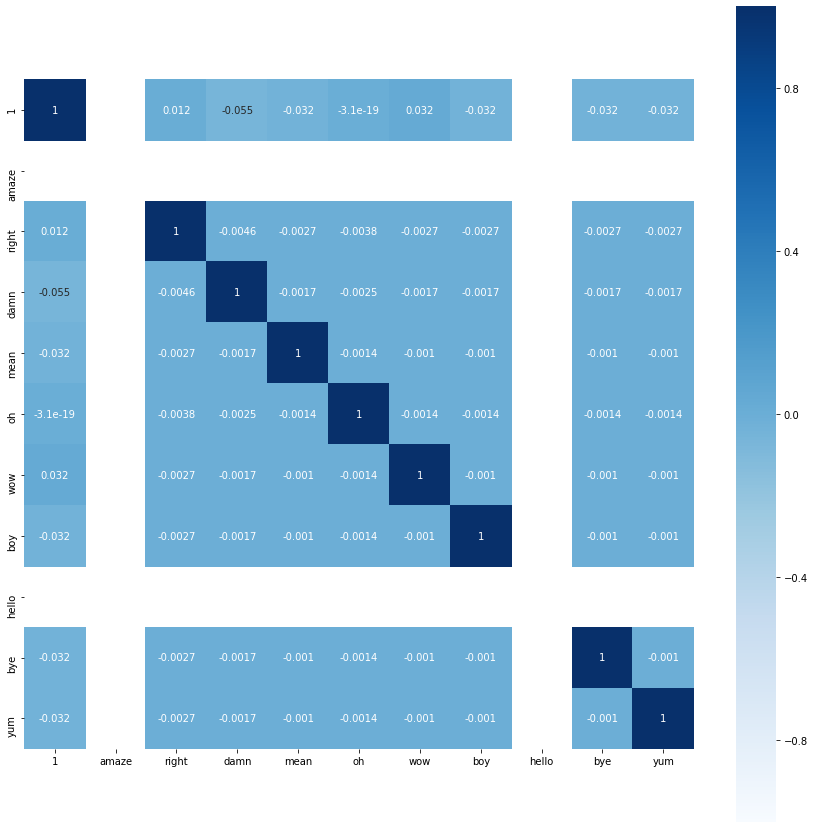

In [496]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [497]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,4:]
target = reviews[1]

In [498]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [499]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 493


### Create confustion matrix to review performance

In [500]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [501]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [502]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,7,493
Actual: Yes,0,500


In [503]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

1.0

In [504]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.01

Interjections performed badly in every regard.  I originally thought this pos type would be the most promising.

### Examine for overfitting

In [505]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.49 , 0.5  , 0.505, 0.5  , 0.5  ])

It doesn't appear as if overfitting is taking place

### Model #5 - Feature engineering using parts of speech - Adjectives

In [506]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [507]:
# tokenize data using spaCy
# I found this function at the below web address
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [508]:
# apply above function
reviews['spacy_tokens'] = reviews[0].apply(lambda x: spacy_tokenizer(x))

In [509]:
# find top words by frequency
bag_of_words = []

for row in reviews.spacy_tokens:
    for word in row:
        bag_of_words.append(word)
            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [510]:
lemma = []
pos = []
tag = []

for doc in nlp.pipe(bag_of_words_df['tokens'].astype('unicode').values, batch_size=50):  
    lemma.append([n.lemma_ for n in doc])
    pos.append([n.pos_ for n in doc])
    tag.append([n.tag_ for n in doc])

bag_of_words_df['lemma'] = lemma
bag_of_words_df['pos'] = pos
bag_of_words_df['tag'] = tag

In [511]:
# bag_of_words_df.lemma = bag_of_words_df.lemma.apply(lambda x: str(x).strip('[]'))
bag_of_words_df.pos = bag_of_words_df.pos.apply(lambda x: ''.join(x))
bag_of_words_df.tag = bag_of_words_df.tag.apply(lambda x: ''.join(x))

In [512]:
bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10)

,tokens,token_count,lemma,pos,tag
609,good,110,[good],ADJ,JJ
621,great,71,[great],ADJ,JJ
577,friendly,27,[friendly],ADJ,JJ
920,nice,26,[nice],ADJ,JJ
414,disappoint,24,[disappoint],ADJ,JJ
386,delicious,23,[delicious],ADJ,JJ
1064,pretty,20,[pretty],ADJ,JJ
123,bad,18,[bad],ADJ,JJ
1539,wrong,17,[wrong],ADJ,JJ
581,fry,16,[fry],ADJ,JJ


In [513]:
reviews.head()

,0,1,spacy_tokens
0,Wow... Loved this place.,1,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, price]"


In [514]:
reviews.spacy_tokens = reviews.spacy_tokens.apply(lambda x: ' '.join(x))

In [515]:
# words I want as features in my model
bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10).loc[:,'tokens'].values

array(['good', 'great', 'friendly', 'nice', 'disappoint', 'delicious',
       'pretty', 'bad', 'wrong', 'fry'], dtype=object)

In [516]:
keywords = bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10).loc[:,'tokens'].values

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(' ' + str(key) + ' ',case=False)

In [517]:
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [518]:
reviews.head()

,0,1,spacy_tokens,good,great,friendly,nice,disappoint,delicious,pretty,bad,wrong,fry
0,Wow... Loved this place.,True,wow ... loved place,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,crust good,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,tasty texture nasty,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,stopped late bank holiday rick steve recommend...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,selection menu great price,False,True,False,False,False,False,False,False,False,False


(11.0, 0.0)

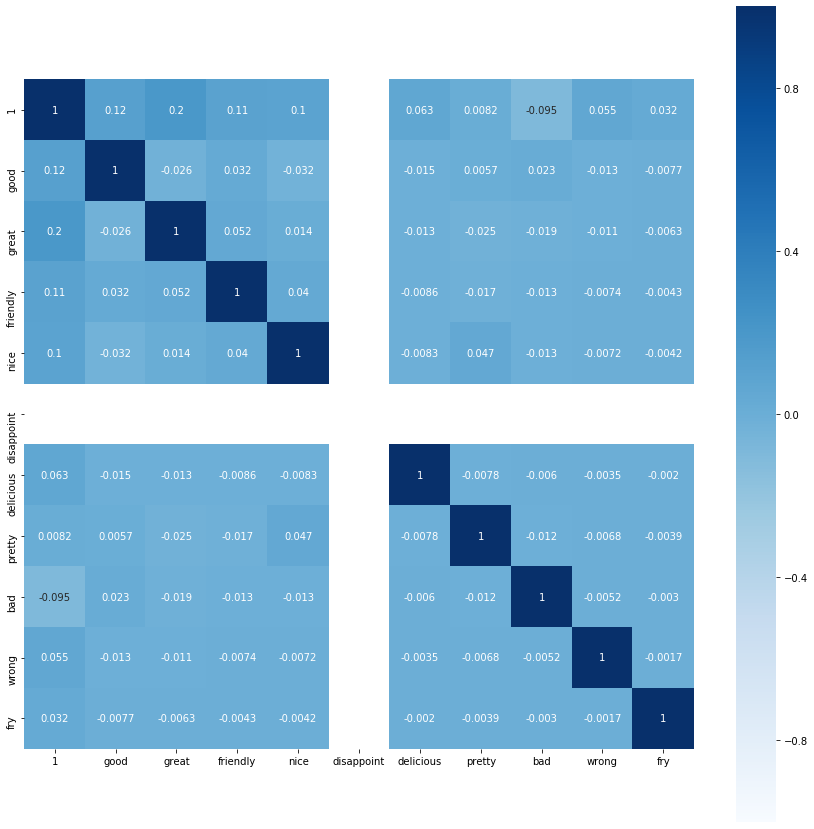

In [519]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [520]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,4:]
target = reviews[1]

In [521]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [522]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 431


### Create confustion matrix to review performance

In [523]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [524]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [525]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,496,4
Actual: Yes,427,73


In [526]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.15

In [527]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.99

Adjectives performed much better at identifying negative sentiment than positive sentiment.

### Examine for overfitting

In [528]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.56 , 0.54 , 0.545, 0.6  , 0.585])

It doesn't appear as if overfitting is taking place

### Model #6 - Feature engineering using parts of speech - verbs

In [529]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [530]:
# tokenize data using spaCy
# I found this function at the below web address
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [531]:
# apply above function
reviews['spacy_tokens'] = reviews[0].apply(lambda x: spacy_tokenizer(x))

In [532]:
# find top words by frequency
bag_of_words = []

for row in reviews.spacy_tokens:
    for word in row:
        bag_of_words.append(word)
            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [533]:
lemma = []
pos = []
tag = []

for doc in nlp.pipe(bag_of_words_df['tokens'].astype('unicode').values, batch_size=50):  
    lemma.append([n.lemma_ for n in doc])
    pos.append([n.pos_ for n in doc])
    tag.append([n.tag_ for n in doc])

bag_of_words_df['lemma'] = lemma
bag_of_words_df['pos'] = pos
bag_of_words_df['tag'] = tag

In [534]:
# bag_of_words_df.lemma = bag_of_words_df.lemma.apply(lambda x: str(x).strip('[]'))
bag_of_words_df.pos = bag_of_words_df.pos.apply(lambda x: ''.join(x))
bag_of_words_df.tag = bag_of_words_df.tag.apply(lambda x: ''.join(x))

In [535]:
bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10)

,tokens,token_count,lemma,pos,tag
293,come,40,[come],VERB,VB
461,eat,35,[eat],VERB,VB
1487,wait,27,[wait],VERB,VB
530,feel,23,[feel],VERB,VB
1386,think,22,[think],VERB,VB
1493,want,17,[want],VERB,VBP
1428,try,16,[try],VERB,VB
770,know,13,[know],VERB,VB
1219,serve,12,[serve],VERB,VB
478,enjoy,11,[enjoy],VERB,VB


In [536]:
reviews.head()

,0,1,spacy_tokens
0,Wow... Loved this place.,1,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, price]"


In [537]:
reviews.spacy_tokens = reviews.spacy_tokens.apply(lambda x: ' '.join(x))

In [538]:
# words I want as features in my model
bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10).loc[:,'tokens'].values

array(['come', 'eat', 'wait', 'feel', 'think', 'want', 'try', 'know',
       'serve', 'enjoy'], dtype=object)

In [539]:
keywords = bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10).loc[:,'tokens'].values

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(' ' + str(key) + ' ',case=False)

In [540]:
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [541]:
reviews.head()

,0,1,spacy_tokens,come,eat,wait,feel,think,want,try,know,serve,enjoy
0,Wow... Loved this place.,True,wow ... loved place,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,crust good,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,tasty texture nasty,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,stopped late bank holiday rick steve recommend...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,selection menu great price,False,False,False,False,False,False,False,False,False,False


(11.0, 0.0)

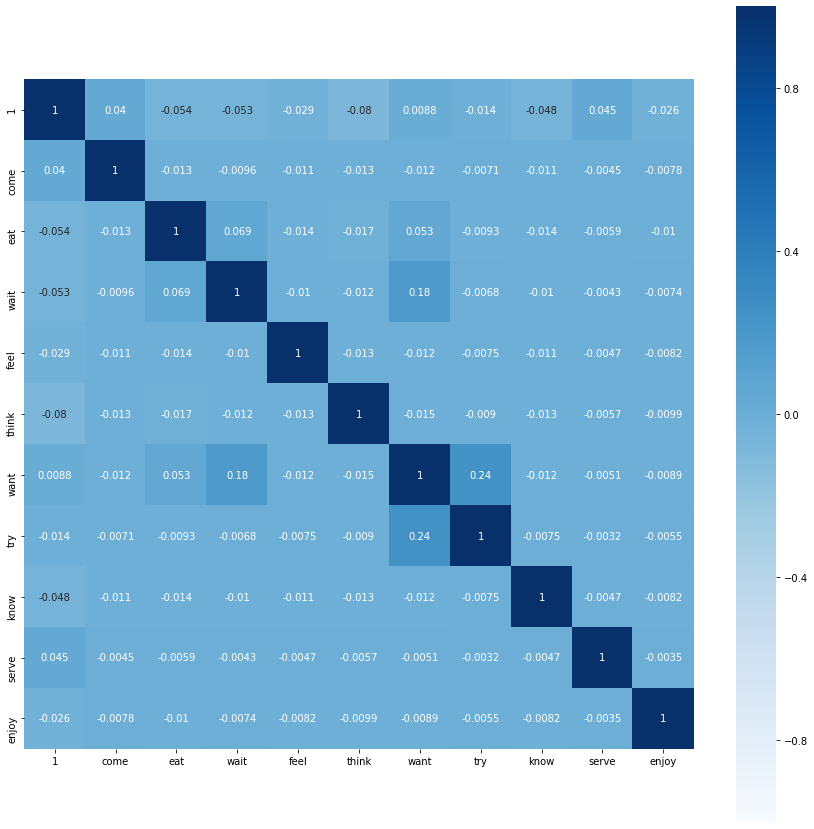

In [542]:
# visualize how well specific keywords perform
plt.figure(figsize=(15, 15))

ax = sns.heatmap(reviews.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, annot=True, 
                 cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [543]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,4:]
target = reviews[1]

In [544]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [545]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 468


### Create confustion matrix to review performance

In [546]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [547]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [548]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,53,447
Actual: Yes,21,479


In [549]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.96

In [550]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.11

Verbs performed very poorly when identifying negative sentiment, but did very well when identifying positive sentiment.

### Examine for overfitting

In [551]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.525, 0.54 , 0.515, 0.505, 0.535])

It doesn't appear as if overfitting is taking place

### Model #7 - Feature engineering using parts of speech - verbs and adjectives, 10 from each

In [552]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [553]:
# tokenize data using spaCy
# I found this function at the below web address
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [554]:
# apply above function
reviews['spacy_tokens'] = reviews[0].apply(lambda x: spacy_tokenizer(x))

In [555]:
# find top words by frequency
bag_of_words = []

for row in reviews.spacy_tokens:
    for word in row:
        bag_of_words.append(word)
            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [556]:
lemma = []
pos = []
tag = []

for doc in nlp.pipe(bag_of_words_df['tokens'].astype('unicode').values, batch_size=50):  
    lemma.append([n.lemma_ for n in doc])
    pos.append([n.pos_ for n in doc])
    tag.append([n.tag_ for n in doc])

bag_of_words_df['lemma'] = lemma
bag_of_words_df['pos'] = pos
bag_of_words_df['tag'] = tag

In [557]:
# bag_of_words_df.lemma = bag_of_words_df.lemma.apply(lambda x: str(x).strip('[]'))
bag_of_words_df.pos = bag_of_words_df.pos.apply(lambda x: ''.join(x))
bag_of_words_df.tag = bag_of_words_df.tag.apply(lambda x: ''.join(x))

In [558]:
bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10)

,tokens,token_count,lemma,pos,tag
293,come,40,[come],VERB,VB
461,eat,35,[eat],VERB,VB
1487,wait,27,[wait],VERB,VB
530,feel,23,[feel],VERB,VB
1386,think,22,[think],VERB,VB
1493,want,17,[want],VERB,VBP
1428,try,16,[try],VERB,VB
770,know,13,[know],VERB,VB
1219,serve,12,[serve],VERB,VB
478,enjoy,11,[enjoy],VERB,VB


In [559]:
bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10)

,tokens,token_count,lemma,pos,tag
609,good,110,[good],ADJ,JJ
621,great,71,[great],ADJ,JJ
577,friendly,27,[friendly],ADJ,JJ
920,nice,26,[nice],ADJ,JJ
414,disappoint,24,[disappoint],ADJ,JJ
386,delicious,23,[delicious],ADJ,JJ
1064,pretty,20,[pretty],ADJ,JJ
123,bad,18,[bad],ADJ,JJ
1539,wrong,17,[wrong],ADJ,JJ
581,fry,16,[fry],ADJ,JJ


In [560]:
reviews.head()

,0,1,spacy_tokens
0,Wow... Loved this place.,1,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, price]"


In [561]:
reviews.spacy_tokens = reviews.spacy_tokens.apply(lambda x: ' '.join(x))

In [562]:
# verbs I want as features in my model
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10).loc[:,'tokens'].values)

['come',
 'eat',
 'wait',
 'feel',
 'think',
 'want',
 'try',
 'know',
 'serve',
 'enjoy']

In [563]:
list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10).loc[:,'tokens'].values)

['good',
 'great',
 'friendly',
 'nice',
 'disappoint',
 'delicious',
 'pretty',
 'bad',
 'wrong',
 'fry']

In [564]:
# combine 10 verbs and 10 adjectives I want as features in my model
list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10).loc[:,'tokens'].values) + \
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10).loc[:,'tokens'].values)

['good',
 'great',
 'friendly',
 'nice',
 'disappoint',
 'delicious',
 'pretty',
 'bad',
 'wrong',
 'fry',
 'come',
 'eat',
 'wait',
 'feel',
 'think',
 'want',
 'try',
 'know',
 'serve',
 'enjoy']

In [565]:
keywords = list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10).loc[:,'tokens'].values) + \
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10).loc[:,'tokens'].values)

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(' ' + str(key) + ' ',case=False)

In [566]:
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [567]:
reviews.head()

,0,1,spacy_tokens,good,great,friendly,nice,disappoint,delicious,pretty,...,come,eat,wait,feel,think,want,try,know,serve,enjoy
0,Wow... Loved this place.,True,wow ... loved place,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,crust good,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,tasty texture nasty,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,stopped late bank holiday rick steve recommend...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,selection menu great price,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [568]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,4:]
target = reviews[1]

In [569]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [570]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 422


### Create confustion matrix to review performance

In [571]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [572]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [573]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,485,15
Actual: Yes,407,93


In [574]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.19

In [575]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.97

A combination of verbs and adjectives does better than only verbs and only adjectives.

### Examine for overfitting

In [576]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.565, 0.535, 0.55 , 0.6  , 0.595])

It doesn't appear as if overfitting is taking place

### Model #7 - Feature engineering using parts of speech - verbs and adjectives, 5 from each

In [585]:
reviews = pd.read_csv('data\\sentiment labelled sentences\\yelp_labelled.txt', delimiter= '\t', header=None)

In [586]:
# tokenize data using spaCy
# I found this function at the below web address
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = en_core_web_sm.load()
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [587]:
# apply above function
reviews['spacy_tokens'] = reviews[0].apply(lambda x: spacy_tokenizer(x))

In [588]:
# find top words by frequency
bag_of_words = []

for row in reviews.spacy_tokens:
    for word in row:
        bag_of_words.append(word)
            
bag_of_words_df = pd.DataFrame(bag_of_words, columns=['tokens'])

bag_of_words_df = bag_of_words_df.groupby('tokens')['tokens'] \
    .count() \
    .reset_index(name= 'token_count') \
    .sort_values(by='token_count', ascending=False)

In [589]:
lemma = []
pos = []
tag = []

for doc in nlp.pipe(bag_of_words_df['tokens'].astype('unicode').values, batch_size=50):  
    lemma.append([n.lemma_ for n in doc])
    pos.append([n.pos_ for n in doc])
    tag.append([n.tag_ for n in doc])

bag_of_words_df['lemma'] = lemma
bag_of_words_df['pos'] = pos
bag_of_words_df['tag'] = tag

In [590]:
# bag_of_words_df.lemma = bag_of_words_df.lemma.apply(lambda x: str(x).strip('[]'))
bag_of_words_df.pos = bag_of_words_df.pos.apply(lambda x: ''.join(x))
bag_of_words_df.tag = bag_of_words_df.tag.apply(lambda x: ''.join(x))

In [591]:
bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(10)

,tokens,token_count,lemma,pos,tag
293,come,40,[come],VERB,VB
461,eat,35,[eat],VERB,VB
1487,wait,27,[wait],VERB,VB
530,feel,23,[feel],VERB,VB
1386,think,22,[think],VERB,VB
1493,want,17,[want],VERB,VBP
1428,try,16,[try],VERB,VB
770,know,13,[know],VERB,VB
1219,serve,12,[serve],VERB,VB
478,enjoy,11,[enjoy],VERB,VB


In [592]:
bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(10)

,tokens,token_count,lemma,pos,tag
609,good,110,[good],ADJ,JJ
621,great,71,[great],ADJ,JJ
577,friendly,27,[friendly],ADJ,JJ
920,nice,26,[nice],ADJ,JJ
414,disappoint,24,[disappoint],ADJ,JJ
386,delicious,23,[delicious],ADJ,JJ
1064,pretty,20,[pretty],ADJ,JJ
123,bad,18,[bad],ADJ,JJ
1539,wrong,17,[wrong],ADJ,JJ
581,fry,16,[fry],ADJ,JJ


In [593]:
reviews.head()

,0,1,spacy_tokens
0,Wow... Loved this place.,1,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[stopped, late, bank, holiday, rick, steve, re..."
4,The selection on the menu was great and so wer...,1,"[selection, menu, great, price]"


In [594]:
reviews.spacy_tokens = reviews.spacy_tokens.apply(lambda x: ' '.join(x))

In [595]:
# verbs I want as features in my model
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(5).loc[:,'tokens'].values)

['come', 'eat', 'wait', 'feel', 'think']

In [596]:
list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(5).loc[:,'tokens'].values)

['good', 'great', 'friendly', 'nice', 'disappoint']

In [597]:
# combine 10 verbs and 10 adjectives I want as features in my model
list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(5).loc[:,'tokens'].values) + \
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(5).loc[:,'tokens'].values)

['good',
 'great',
 'friendly',
 'nice',
 'disappoint',
 'come',
 'eat',
 'wait',
 'feel',
 'think']

In [598]:
keywords = list(bag_of_words_df.loc[bag_of_words_df.pos == 'ADJ'].head(5).loc[:,'tokens'].values) + \
list(bag_of_words_df.loc[bag_of_words_df.pos == 'VERB'].head(5).loc[:,'tokens'].values)

# create column for each keyword above
# return bool value if keyword found
for key in keywords:
    reviews[str(key)] = reviews[0].str.contains(' ' + str(key) + ' ',case=False)

In [599]:
# convert sentiment column into boolean 
reviews[1] = (reviews[1] == 1)

In [600]:
reviews.head()

,0,1,spacy_tokens,good,great,friendly,nice,disappoint,come,eat,wait,feel,think
0,Wow... Loved this place.,True,wow ... loved place,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,crust good,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,tasty texture nasty,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,stopped late bank holiday rick steve recommend...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,selection menu great price,False,True,False,False,False,False,False,False,False,False


In [601]:
# create variables that can easily
# be fed into naive bayes below
data = reviews.iloc[:,4:]
target = reviews[1]

In [602]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [603]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 435


### Create confustion matrix to review performance

In [604]:
# create empty matrix
c_matrix = pd.DataFrame(
    index= ['Actual: No', 'Actual: Yes'],
    columns= ['Predicted: No', 'Predicted: Yes'])

In [605]:
c_matrix.iloc[0,0] = sum((y_pred == False) & (target == False))
c_matrix.iloc[0,1] = sum((y_pred == True) & (target == False))
c_matrix.iloc[1,0] = sum((y_pred == False) & (target == True))
c_matrix.iloc[1,1] = sum((y_pred == True) & (target == True))

In [606]:
c_matrix

,Predicted: No,Predicted: Yes
Actual: No,493,7
Actual: Yes,428,72


In [607]:
# Sensitivity - the percent of total positives correctly identified

round(sum((y_pred == True) & (target == True)) / \
sum(target == True), 2)

0.14

In [608]:
# Specificity - percent of total negatives correctly identified

round(sum((y_pred == False) & (target == False)) / \
sum(target == False), 2)

0.99

A split of 5 verbs and 5 adjectives seems to mostly hurt sensitivity, but it helped specificity.

### Examine for overfitting

In [609]:
# use sklearn cross_val_score to 
# examine holdout groups in order 
# to check for overfitting

cross_val_score(bnb, data, target, cv=5)

array([0.57 , 0.515, 0.54 , 0.585, 0.59 ])

It doesn't appear as if overfitting is taking place

### Spare Parts

In [610]:
# the best resource I could find https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XcCxE-hKhnI
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(reviews.iloc[:,0])

In [611]:
tfidf_transformer= TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
the,1.797287
and,2.091644
was,2.340410
to,2.699269
is,2.884874
...,...
cocktails,7.215608
meats,7.215608
meatloaf,7.215608
middle,7.215608


In [612]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# input data
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(reviews.iloc[:,0])

In [613]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(10)

,tfidf
crust,0.779675
good,0.387764
not,0.364226
is,0.330281
positive,0.000000
pork,0.000000
portion,0.000000
portions,0.000000
possible,0.000000
poorly,0.000000
